In [1]:
import zipfile as zp
import pandas as pd
#from pypac import PACSession as Session #or use requests below if non-ONS
from requests import Session
from io import BytesIO
import os
import matplotlib.pyplot as plt
import re
import sklearn.cluster as learn
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


%matplotlib inline

In [28]:
path = r'C:\Users\charl\Documents\CompSci\Year3\DataScienceCoursework\DataScienceLoneliness'
data = pd.read_csv(path + r'\2018_final_data.csv')
data_wo_outliers = data[data["loneills"]<5]
data_wo_outliers = data_wo_outliers[data_wo_outliers["loneills"]>-5]
data_wo_outliers = data_wo_outliers.rename(columns = {'loneills':'Loneliness index score'});
data_wo_outliers.dtypes

Unnamed: 0                         int64
pcstrip                           object
Year                               int64
NUMBER_OF_PATIENTS               float64
SHA                               object
PCT                               object
oseast1m                         float64
osnrth1m                         float64
lsoa11                            object
msoa11                            object
ru11ind                           object
rgn                               object
laua                              object
imd                              float64
depression_perc                  float64
alzheimers_perc                  float64
blood pressure_perc              float64
hypertension_perc                float64
diabeties_perc                   float64
cardiovascular disease_perc      float64
insomnia_perc                    float64
addiction_perc                   float64
social anxiety_perc              float64
loneliness_perc                  float64
depression_zscor

<AxesSubplot: xlabel='oseast1m', ylabel='osnrth1m'>

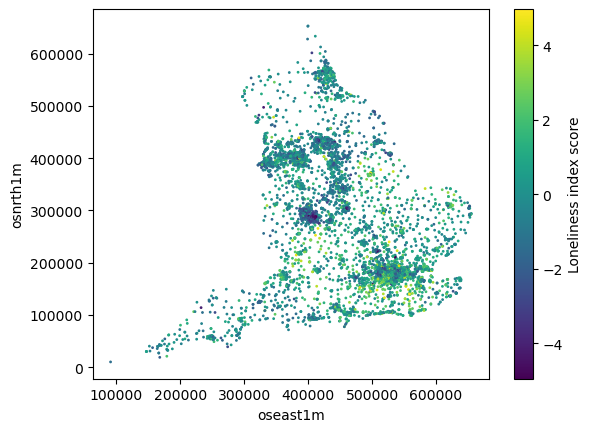

In [29]:
data_wo_outliers.plot.scatter(x = 'oseast1m',y = 'osnrth1m',s = 1,c='Loneliness index score')


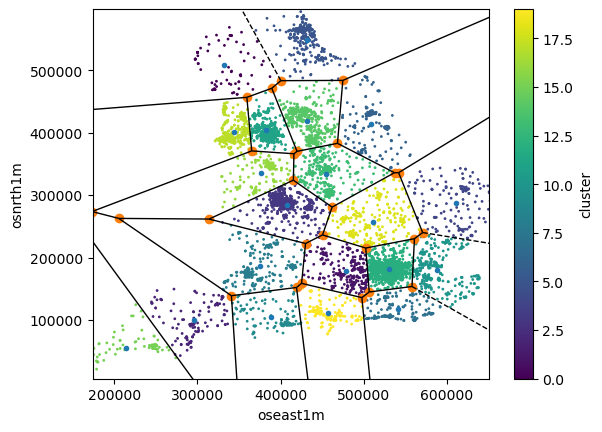

In [30]:
kmeans = learn.KMeans(20)
data_wo_outliers['cluster'] = kmeans.fit_predict(data_wo_outliers[['oseast1m','osnrth1m']])

data_wo_outliers.plot.scatter(x = 'oseast1m',y = 'osnrth1m',s = 1,c='cluster',colormap='viridis')
vor = Voronoi(kmeans.cluster_centers_)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()


<AxesSubplot: xlabel='oseast1m', ylabel='osnrth1m'>

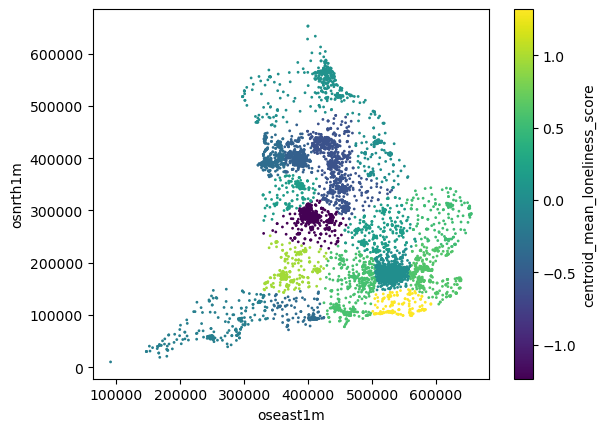

In [32]:
data_wo_outliers['centroid_mean_loneliness_score'] = data_wo_outliers.groupby('cluster')['Loneliness index score'].transform('mean')
data_wo_outliers.plot.scatter(x = 'oseast1m',y = 'osnrth1m',s = 1,c='centroid_mean_loneliness_score',colormap='viridis')



In [6]:
train, test = train_test_split(data, test_size=0.2)
#print(train.shape)
clf = MLPClassifier(max_iter = 500)
#train[['oseast1m','osnrth1m']].values


clf.fit(train['loneills'].values.reshape(-1,1),train['centroid'].values)
clf.score(test['loneills'].values.reshape(-1,1),test['centroid'].values)

0.20896656534954408

[[  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0  92   0   0
    0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0  62   0   0
    0   0]
 [  0   0  31   0   0   0   0   0   0   0   0   0   0   0   0  98   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  30   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  69   0   0
    0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0  49   0   0
    0   0]
 [  0   0   8   0   0   0   0   0   0   0   0   0   0   0   0  55   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  63   0   0
    0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0  60   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0
    0   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0  93

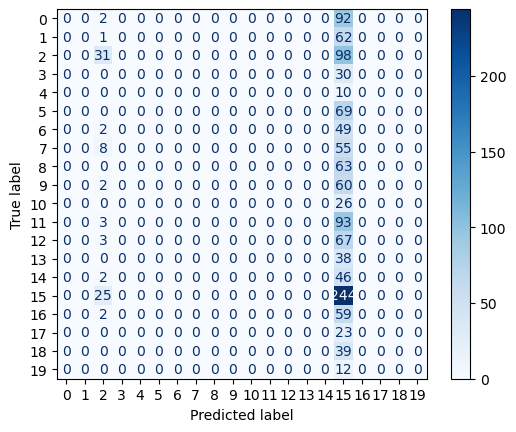

In [7]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        test['loneills'].values.reshape(-1,1),
        test['centroid'].values,
        cmap=plt.cm.Blues,
        normalize=None
    )
print(disp.confusion_matrix)

In [20]:
data_wo_outliers["msoa_num"] = data_wo_outliers['msoa11'].str[1:].astype(int)



<AxesSubplot: xlabel='oseast1m', ylabel='osnrth1m'>

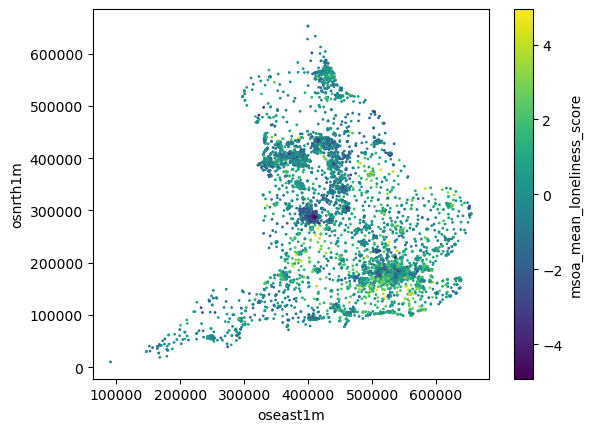

In [35]:
#data_wo_outliers.plot.scatter(x = 'oseast1m',y = 'osnrth1m',s = 1,c='msoa_num',colormap='viridis')

data_wo_outliers['msoa_mean_loneliness_score'] = data_wo_outliers.groupby('msoa11')['Loneliness index score'].transform('mean')
data_wo_outliers.plot.scatter(x = 'oseast1m',y = 'osnrth1m',s = 1,c='msoa_mean_loneliness_score',colormap='viridis')
#data_wo_outliers.plot.scatter(x = 'oseast1m',y = 'osnrth1m',s = 1,c='Loneliness index score')



In [10]:
clf2 = MLPClassifier(max_iter = 250)
#train[['oseast1m','osnrth1m']].values


clf2.fit(train['loneills'].values.reshape(-1,1),train['msoa11'].values)
clf2.score(test['loneills'].values.reshape(-1,1),test['msoa11'].values)

C:\Users\charl\anaconda3\envs\ml_labs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0007598784194528875

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf2,
        test['loneills'].values.reshape(-1,1),
        test['msoa11'].values,
        cmap=plt.cm.Blues,
        normalize=None
    )
print(disp.confusion_matrix)